### Display portfolio optimisation charts for 4 companies

Import necessary libraries

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import riskfolio as rp
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [15]:
data = pd.read_csv('/home/becode/Desktop/Time Series/venv/scr/data/yfin_AdjClose.csv', index_col='Date', parse_dates = ['Date'])
Y = data.pct_change()
Y = Y.replace([np.inf, -np.inf], np.nan).dropna()

In [16]:
# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)


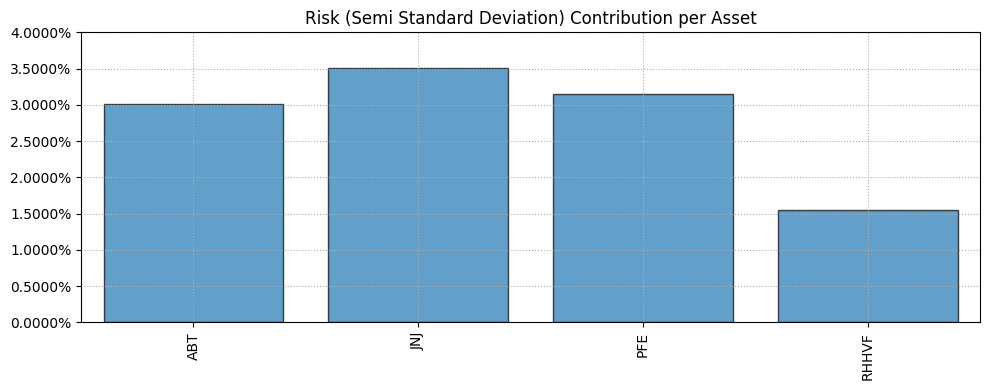

In [17]:
# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w1, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=4, width=10, ax=None)

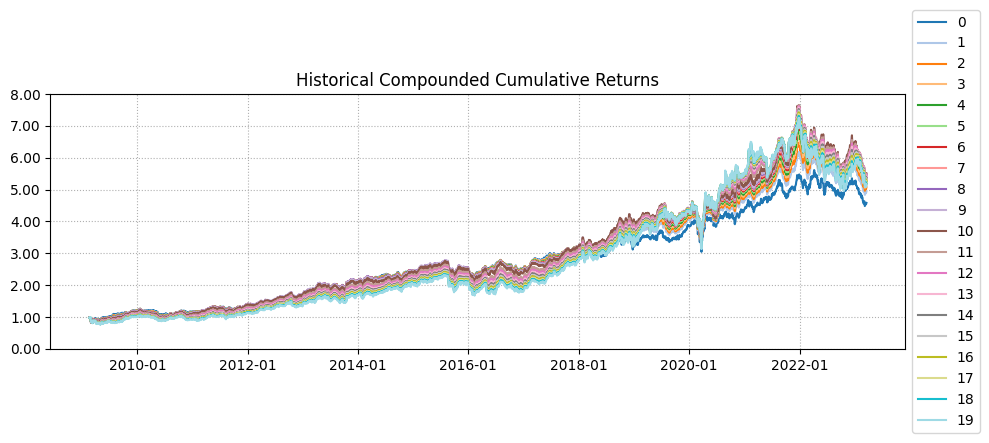

In [18]:
ax = rp.plot_series(returns=Y, w=ws, cmap='tab20', height=4, width=10,
                    ax=None)

Efficient Frontier - set of investment portfolios that are expected to provide the highest returns at a given level of risk

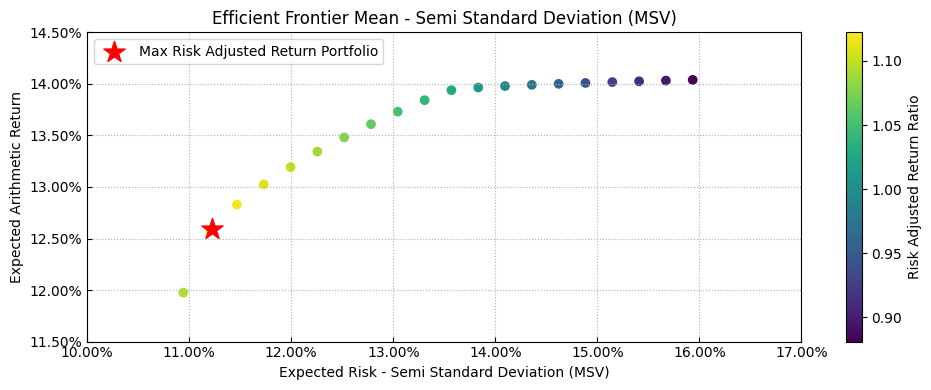

In [19]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns,
                       rm=rm, rf=0, alpha=0.05, cmap='viridis', w=w1,
                       label=label, marker='*', s=16, c='r',
                       height=4, width=10, t_factor=252, ax=None)

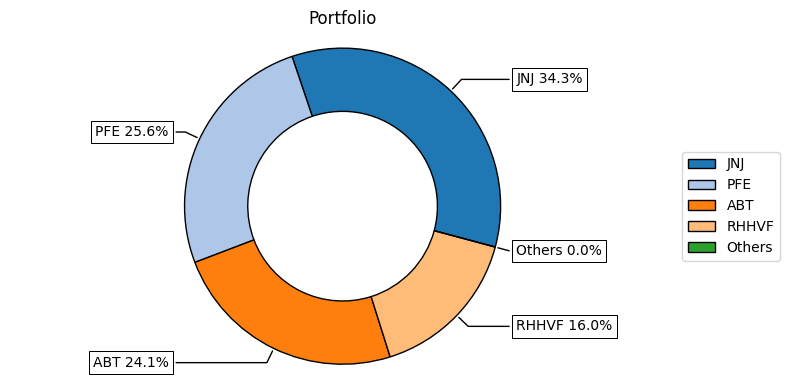

In [20]:
ax = rp.plot_pie(w=w1, title='Portfolio', height=4, width=8,
                 cmap="tab20", ax=None)

# Objective function 'MinRisk' 

In [21]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio
# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_covs = ['hist', 'ledoit', 'oas', 'shrunk', 'gl', 'ewma1',
               'ewma2','jlogo', 'fixed', 'spectral', 'shrink',
               'gerber1', 'gerber2']

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_s = pd.DataFrame([])

for i in method_covs:
    port.assets_stats(method_mu=method_mu, method_cov=i, d=0.94)
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = method_covs


display(w_s.style.format("{:.2%}").background_gradient(cmap='YlGn'))

W Matrix too small 

You must convert self.cov to a positive definite matrix


,hist,ledoit,oas,shrunk,gl,ewma1,ewma2,jlogo,fixed,spectral,shrink,gerber1,gerber2
ABT,13.06%,13.47%,13.19%,16.33%,14.07%,8.26%,8.26%,13.06%,15.96%,0.00%,6.86%,18.64%,16.31%
JNJ,54.56%,53.59%,54.27%,46.79%,52.18%,71.39%,71.39%,54.56%,54.23%,100.00%,71.38%,44.15%,49.19%
PFE,11.29%,11.73%,11.42%,14.81%,12.36%,2.22%,2.22%,11.29%,14.94%,0.00%,4.71%,17.15%,13.73%
RHHVF,21.08%,21.21%,21.12%,22.07%,21.39%,18.13%,18.13%,21.08%,14.87%,0.00%,17.06%,20.06%,20.77%


<Axes: >

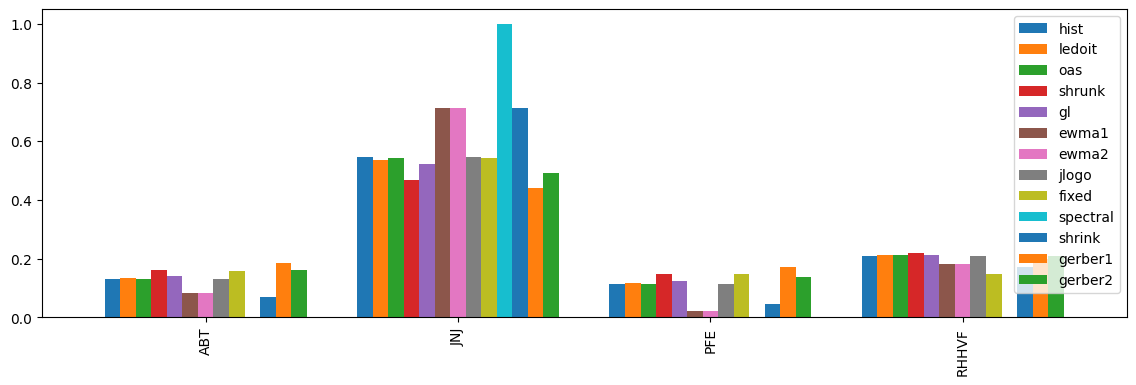

In [22]:
# Plotting a comparison of assets weights for each portfolio
fig, ax = plt.subplots(figsize=(14,4))
w_s.plot.bar(ax=ax, width=0.8)

# Objective function 'Sharpe' 
Calculating the portfolio that maximizes Sharpe ratio.

In [23]:
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe

w_s = pd.DataFrame([])

for i in method_covs:
    port.assets_stats(method_mu=method_mu, method_cov=i, d=0.94)
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = method_covs
display(w_s.style.format("{:.2%}").background_gradient(cmap='YlGn'))

W Matrix too small 

You must convert self.cov to a positive definite matrix


,hist,ledoit,oas,shrunk,gl,ewma1,ewma2,jlogo,fixed,spectral,shrink,gerber1,gerber2
ABT,25.33%,25.49%,25.38%,26.50%,25.07%,16.70%,16.70%,25.33%,26.22%,0.00%,24.90%,25.24%,25.42%
JNJ,36.32%,35.87%,36.18%,32.78%,36.16%,51.49%,51.49%,36.32%,41.53%,100.00%,44.94%,35.55%,36.34%
PFE,21.94%,22.14%,22.00%,23.58%,21.89%,20.92%,20.92%,21.94%,23.63%,0.00%,20.03%,22.89%,21.82%
RHHVF,16.42%,16.50%,16.44%,17.14%,16.89%,10.88%,10.88%,16.42%,8.62%,0.00%,10.13%,16.32%,16.41%


<Axes: >

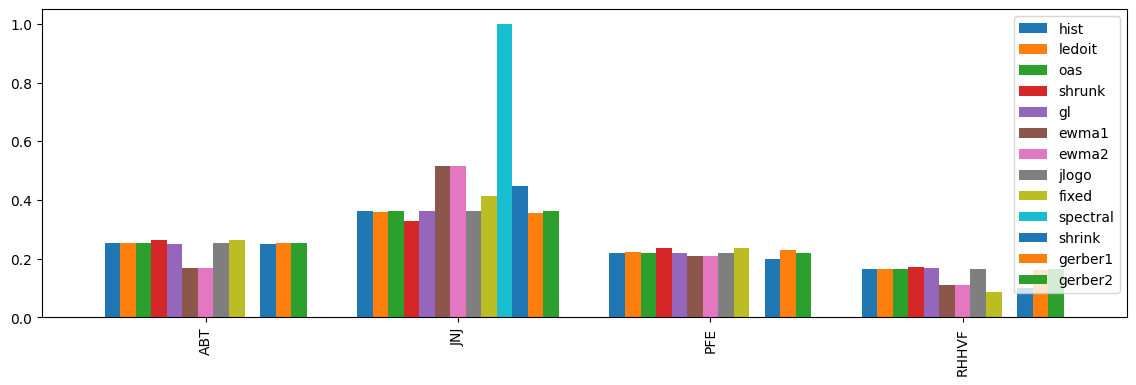

In [24]:
# Plotting a comparison of assets weights for each portfolio
ax, fig = plt.subplots(figsize=(14,4))

w_s.plot.bar(ax=fig, width=0.8)

## Complete jupyter_report
Estimate the portfolio that maximizes the risk adjusted return ratio<br>
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

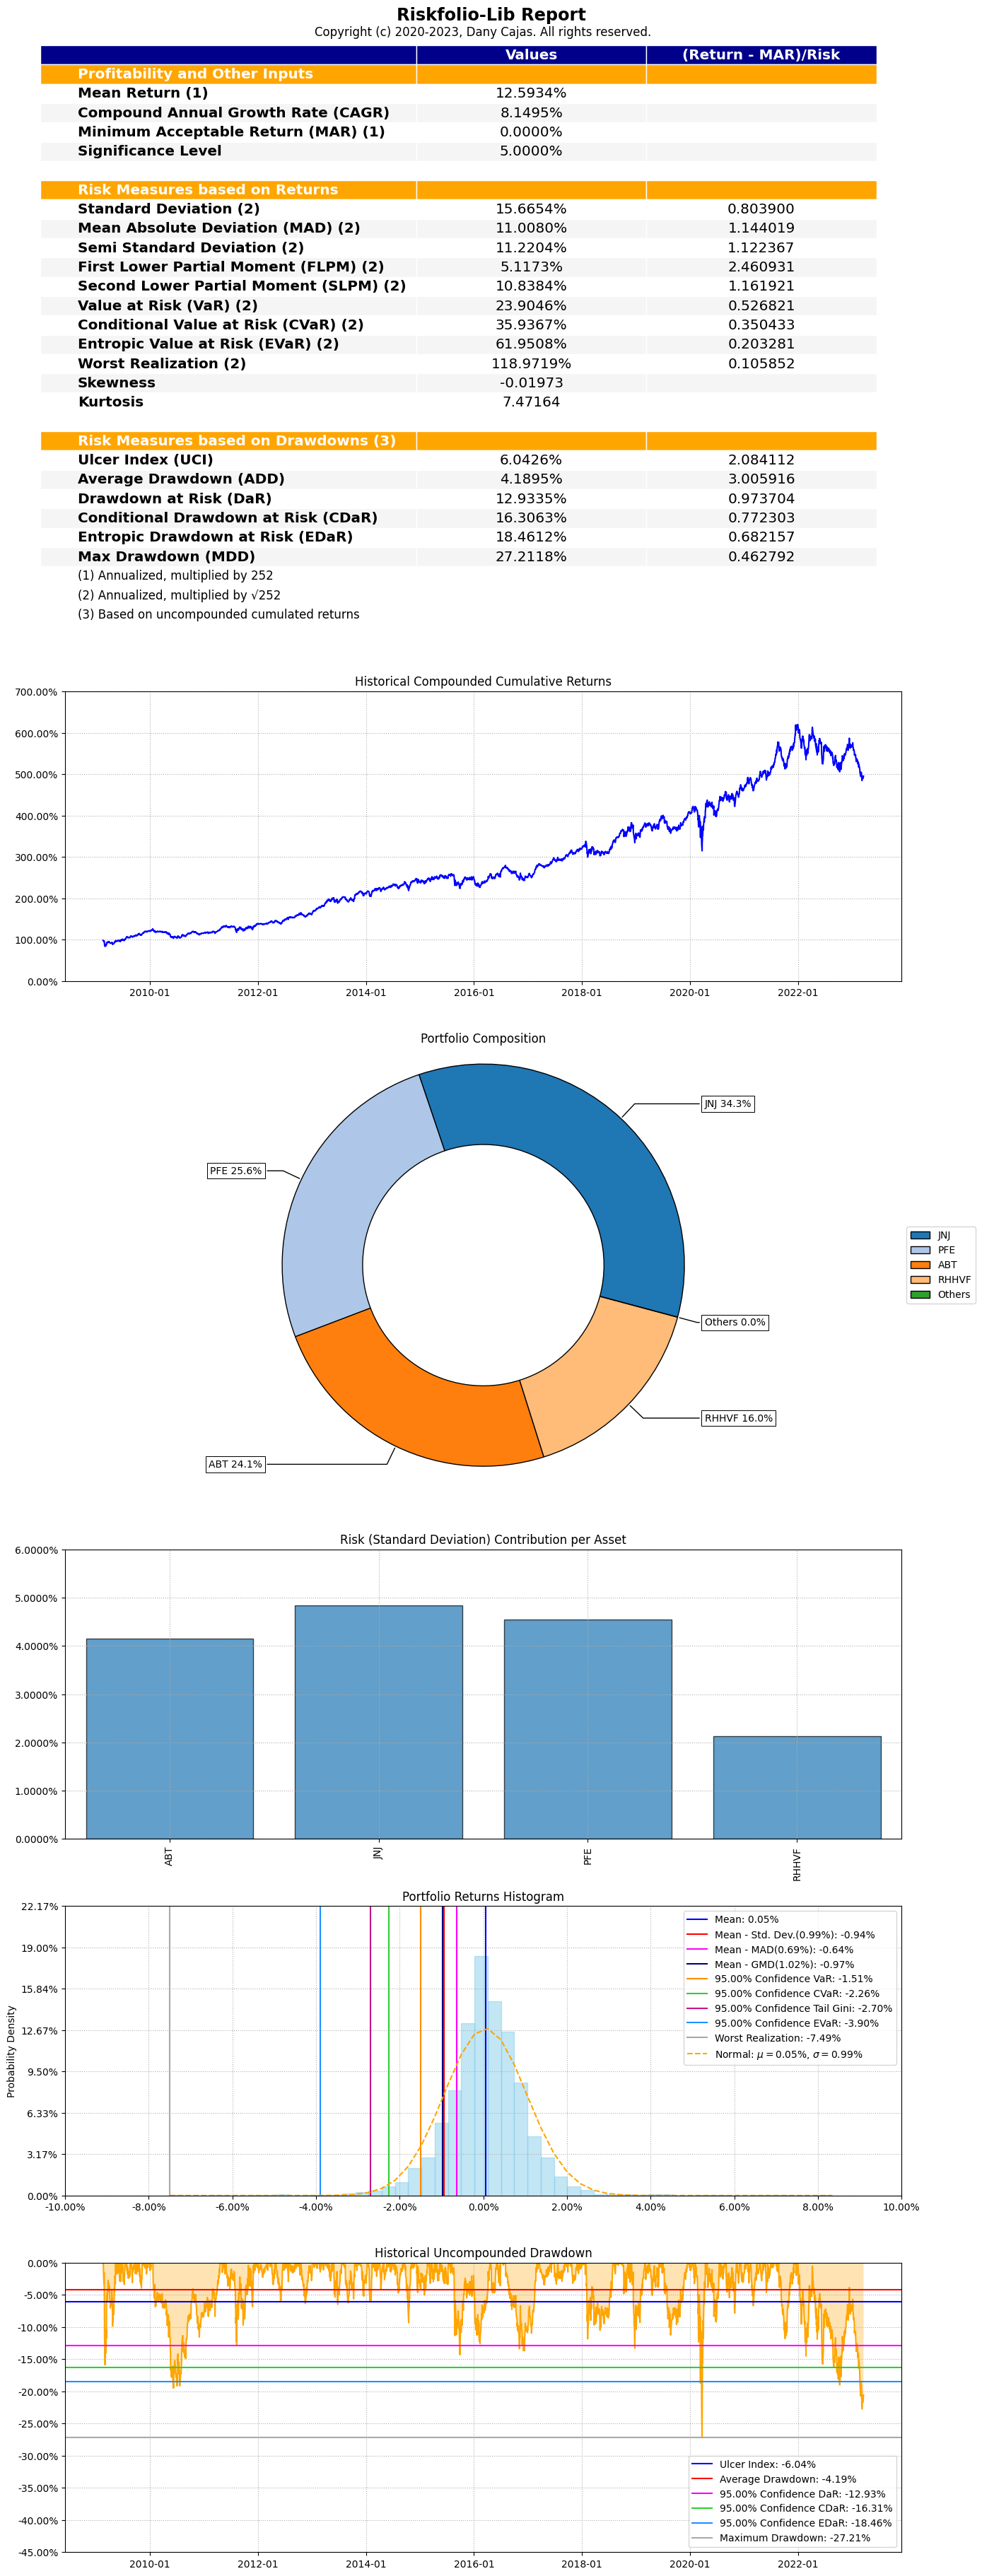

In [25]:
ax = rp.jupyter_report(Y, w1, rm='MV', rf=0, alpha=0.05, height=6, width=14, others=0.05, nrow=25)